In [1]:
''''' 
sklearn里面的TF-IDF主要用到了两个函数：CountVectorizer()和TfidfTransformer()。 
    CountVectorizer是通过fit_transform函数将文本中的词语转换为词频矩阵。 
    矩阵元素weight[i][j] 表示j词在第i个文本下的词频，即各个词语出现的次数。 
    通过get_feature_names()可看到所有文本的关键字，通过toarray()可看到词频矩阵的结果。 
    TfidfTransformer也有个fit_transform函数，它的作用是计算tf-idf值。 
'''
import time       
import re          
import os    
import sys
import codecs
import shutil
import numpy as np
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer   
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 

#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频  
vectorizer = CountVectorizer()

#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer() 
#直接用正则表达式切分，若用tokenize会出现byte字符，无法用utf8 decode
#from nltk.tokenize import word_tokenize

A = [] #一个elm为一个文档的list

num = 1
while(num<501):
    f1 = open('./doc/' + "News_"  + str(num) + "_E.txt", 'r').read()
    reg = re.compile('\\W*')#除了单词外的所有特殊符号包括空格
    text = reg.split(f1)
    B = " ".join(text)
    #type(B)
    A.append(B)
    num += 1
    
print A[499]

 alex robert australiaansw oct 24 2017 author 181 answer 17 2k answer viewsani type custom essay write helpacadem life often hectic difficult despit daili effort keep class daili assign student fail catch cours progress student might fault lag sheer pressur complex routin make difficult student catch cours feel struck assign problem need custom essay write help servic one stop solut problem queri regard essay write custom essay write definit regard hire expert take care essay design conclus therefor social activ fun assign take care essay submiss 291 view view upvot 


In [2]:
print len(A)

500


In [3]:
#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵  
tfidf = transformer.fit_transform(vectorizer.fit_transform(A)).toarray()
tfidf
#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重  

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
resName = "Tfidf_Result.txt"  
result = codecs.open(resName, 'w', 'utf-8')
#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重    
for i in range(len(tfidf)):  
    result.write(u"-------这里输出第" + str(i) + u"类文本的词语tf-idf权重------") 
    for j in range(len(tfidf[i])):  
        result.write(str(tfidf[i][j]) + ' ')  
    result.write('\r\n\r\n')
    
result.close()

In [4]:
# rescale the data: mean 0, std:1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tfidf)
scaled_df = scaler.transform(tfidf)
scaled_df

array([[-0.08725465, -0.11853788, -0.05542822, ..., -0.04476615,
        -0.04476615, -0.04476615],
       [-0.08725465, -0.11853788, -0.05542822, ..., -0.04476615,
        -0.04476615, -0.04476615],
       [-0.08725465, -0.11853788, -0.05542822, ..., -0.04476615,
        -0.04476615, -0.04476615],
       ..., 
       [-0.08725465, -0.11853788, -0.05542822, ..., -0.04476615,
        -0.04476615, -0.04476615],
       [-0.08725465, -0.11853788, -0.05542822, ..., -0.04476615,
        -0.04476615, -0.04476615],
       [-0.08725465, -0.11853788, -0.05542822, ..., -0.04476615,
        -0.04476615, -0.04476615]])

In [23]:
len(scaled_df[0])

163397

In [5]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans()
kmeans.set_params(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [59]:
kmeans.cluster_centers_

array([[  1.30382743e-04,   1.42264447e-05,  -1.22981239e-02, ...,
         -4.47661481e-02,  -4.47661481e-02,  -4.47661481e-02],
       [ -6.50609888e-02,  -7.09899589e-03,   6.13676381e+00, ...,
          2.23383079e+01,   2.23383079e+01,   2.23383079e+01]])

In [50]:
mylist1 = list(label)
myset1  = set(mylist1)
dict1 = {}
for item in myset1:
    dict1.update({item : mylist1.count(item)})
dict1

{0: 499, 1: 1}

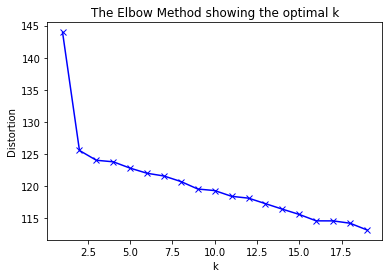

In [6]:
#Determine optimal k
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(scaled_df)
    kmeanModel.fit(scaled_df)
    distortions.append(sum(np.min(cdist(scaled_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

# plot the elbow graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [7]:
len(distortions)

19

In [19]:
import numpy as np
np.set_printoptions(suppress=True) #不用科学计数法

L1=distortions[0:len(distortions)-1]
L2=distortions[1:len(distortions)]
ret = map(lambda x, y: (x-y)/x  , L1, L2)
ret

[0.1277202963026785,
 0.01214960398302679,
 0.0019203939844369808,
 0.0079838923893973835,
 0.0064745420727654549,
 0.0034902068436427243,
 0.0070668645507791271,
 0.0096578494186362728,
 0.0020076727061749148,
 0.0074998226591994786,
 0.0023994967461628026,
 0.0072417936428425386,
 0.0072935816169752881,
 0.0070651118469353142,
 0.008605945790715247,
 6.1556549070836383e-05,
 0.0031488206174422606,
 0.0091272611481743107]

In [36]:
kmeans2 = KMeans()
kmeans2.set_params(n_clusters = 16)
kmeans2.fit(scaled_df)
label2 = kmeans2.labels_
print label2

[ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  4  7  0  0  0 13  6  0  0  0
  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0
  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11 12
  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0

In [7]:
type(label2[0])

numpy.int32

In [37]:
center = kmeans2.cluster_centers_
print center

[[  3.41099372e-05   1.70416309e-03  -1.10531315e-02 ...,  -4.47661481e-02
   -4.47661481e-02  -4.47661481e-02]
 [ -6.50609888e-02  -7.09899589e-03   6.13676381e+00 ...,   2.23383079e+01
    2.23383079e+01   2.23383079e+01]
 [ -8.72546481e-02  -1.18537877e-01  -5.54282176e-02 ...,  -4.47661481e-02
   -4.47661481e-02  -4.47661481e-02]
 ..., 
 [ -8.72546481e-02  -1.18537877e-01  -5.54282176e-02 ...,  -4.47661481e-02
   -4.47661481e-02  -4.47661481e-02]
 [ -8.72546481e-02  -1.18537877e-01  -5.54282176e-02 ...,  -4.47661481e-02
   -4.47661481e-02  -4.47661481e-02]
 [ -8.72546481e-02  -1.18537877e-01  -5.54282176e-02 ...,  -4.47661481e-02
   -4.47661481e-02  -4.47661481e-02]]


In [25]:
test_co = [a for a in range(16)]
test_co

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

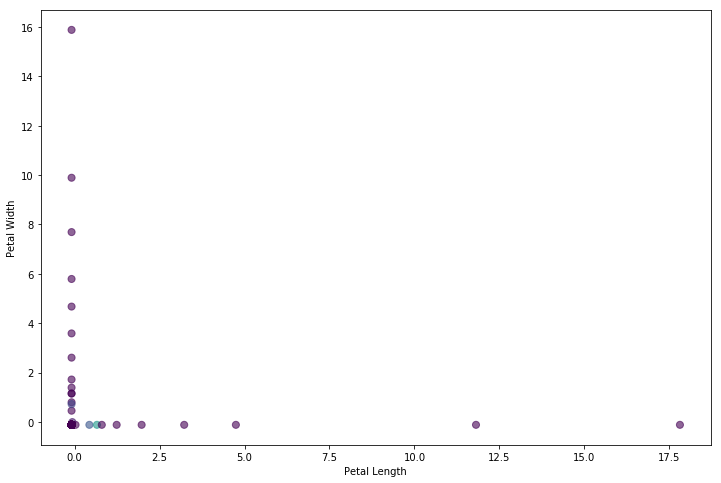

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c = kmeans2.labels_, alpha=0.6, s = 50)
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], marker = "+", s = 1000, c = [i for i in range(2)])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [9]:
mylist = list(label2)
myset  = set(mylist)
dict = {}
for item in myset:
    dict.update({item : mylist.count(item)})
dict

{0: 2,
 1: 1,
 2: 484,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1}

In [22]:
print kmeans2.inertia_

8936256.67816


In [39]:
#找属于第类的的文本索引（即label2的下标）
belong_0 = np.where(label2 == 0)
belong_0

(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
         14,  17,  18,  19,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         73,  74,  75,  76,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
        182, 183, 184, 185, 186, 187, 188, 189, 190

In [40]:
center[0]

array([  3.41099372e-05,   1.70416309e-03,  -1.10531315e-02, ...,
        -4.47661481e-02,  -4.47661481e-02,  -4.47661481e-02])

In [41]:
scaled_df[0]

array([-0.08725465, -0.11853788, -0.05542822, ..., -0.04476615,
       -0.04476615, -0.04476615])

In [42]:
Dis = []
for ind in range(0,500):#belong_0[0]:
    op = np.sqrt(np.sum(np.square(center[0]-scaled_df[ind])))#第0类中所有点距离中心点的距离
    Dis.append(op)
Dis

[163.02214024781449,
 180.10121637758976,
 121.58301904151733,
 138.17192195003963,
 166.29739090050484,
 264.46595871835245,
 145.44085473400844,
 444.67495044121534,
 215.80767290648444,
 257.80012265814622,
 204.71748296814621,
 203.41924587559626,
 78.990662552933941,
 210.04693127421902,
 197.42618030552362,
 395.45248354536625,
 757.09770502039964,
 249.72923382283898,
 168.12852614593075,
 118.09270571809007,
 322.24427953989419,
 360.45245107050039,
 303.64023817219862,
 182.8793206401597,
 163.68504057235481,
 178.00414625970186,
 260.81983653016539,
 150.39476864972502,
 149.63277840515099,
 265.29793611308662,
 132.56254788747094,
 155.87288379610962,
 93.062659089639865,
 57.849528724007648,
 150.47434615011628,
 231.06674735869348,
 226.88168315290304,
 129.98221192526054,
 278.16240145924667,
 59.281960172259581,
 163.94350258333361,
 112.00533398832873,
 328.29761685364417,
 83.534141352854334,
 103.57713188683519,
 224.06494488247992,
 141.26466774605328,
 133.329766430

In [14]:
len(Dis)

500

In [15]:
Dis_np = np.array(Dis)
Dis_np

array([  163.01135043,   180.09558476,   121.58541341,   138.16594511,
         166.28757154,   264.46606269,   145.44072395,   444.66864916,
         215.80647358,   257.79890576,   204.7139837 ,   203.40060626,
          78.98041582,   210.03768142,   197.41963649,   395.45937779,
         757.10405126,   249.72252541,   168.12627685,   118.08827149,
         322.23813907,   359.70475022,   303.63948587,   182.8746973 ,
         163.68390981,   177.97716689,   260.81665524,   150.38358045,
         149.62733947,   265.28949482,   132.5274331 ,   155.86445453,
          93.05020095,    57.83004316,   150.44025323,   230.58742473,
         226.88709479,   129.98311594,   278.71967279,    59.2746645 ,
         163.9298168 ,   111.99292808,   328.29683646,    83.53365439,
         103.5733462 ,   224.06737731,   141.25315663,   133.32296065,
         183.10623395,   223.17235184,   118.84861442,   396.82905904,
         115.73014922,   258.09357865,   257.10977732,   249.11011629,
      

In [29]:
 Dis_np.argsort()[:5][::-1]#顺序自始至终没有变过，返回前五个数即距离最小的文本的索引

array([102, 387, 146, 494, 437], dtype=int64)

In [33]:
str1 = raw_input("Input file number: ")
str2 = raw_input("Input file number: ")
str3 = raw_input("Input file number: ")
str4 = raw_input("Input file number: ")
str5 = raw_input("Input file number: ")

file1 = "News_"  + str1 + "_E.txt"
file2 = "News_"  + str2 + "_E.txt"
file3 = "News_"  + str3 + "_E.txt"
file4 = "News_"  + str4 + "_E.txt"
file5 = "News_"  + str5 + "_E.txt"

filenames = ['./doc/' + file1, './doc/' + file2, './doc/' + file3, './doc/' + file4, './doc/' + file5]#relative filepath
for i in range(0,5):
    f1 = open(filenames[i], 'r').read()
    print ("\n")
    print (filenames[i])
    print f1

Input file number: 102
Input file number: 387
Input file number: 146
Input file number: 494
Input file number: 437


./doc/News_102_E.txt
 sergey levin assist professor uc berkeley eec address 754 sutardja dai hall uc berkeley berkeley ca 94720 1758 email prospect student pleas read contact thank interest lab howev ask contact directli regard undergradu ms phd admiss abl repli new student join lab everi year encourag submit applic uc berkeley eec phd program applic review thoroughli need contact directli alreadi student uc berkeley encourag get touch uc berkeley undergradu student interest particip research pleas also includ transcript cv assist professor depart electr engin comput scienc uc berkeley research focu intersect control machin learn aim develop algorithm techniqu endow machin abil autonom acquir skill execut complex task particular interest learn use acquir complex behavior skill order endow machin greater autonomi intellig see formal biographi click biographi sergey levin 

In [5]:
import random
def foo(n):
    random.seed()
    c1 = 0
    c2 = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        r1 = x * x + y * y
        r2 = (1 - x) * (1 - x) + (1 - y) * (1 - y)
        if r1 <= 1 and r2 <= 1:
            c1 += 1
        else:
            c2 += 1
    return c1 / c2

In [7]:
foo(10000000)

1

In [10]:
import math
math.tan(53/180*math.pi)

0.0

In [11]:
(math.pi-2)/(4-math.pi)

1.3298961831627436

In [12]:
math.e**(6/21)

1.0

In [3]:
import numpy as np
np.set_printoptions(suppress=True)

A = np.array([[1, 2, 3], [4, 5, 6]])#, [7, 8, 9], [10, 11, 12]])
a = np.linalg.svd(A)
a

(array([[-0.3863177 , -0.92236578],
        [-0.92236578,  0.3863177 ]]),
 array([ 9.508032  ,  0.77286964]),
 array([[-0.42866713, -0.56630692, -0.7039467 ],
        [ 0.80596391,  0.11238241, -0.58119908],
        [ 0.40824829, -0.81649658,  0.40824829]]))

In [121]:
vectora = np.array([1, 2, 0, 2, 1])  
vectorb = np.array([1,3,0,1,3])  
vectorc = np.array([0,2,0,1,1])
  
op_ab = np.dot(vectora,vectorb)/(np.linalg.norm(vectora)*(np.linalg.norm(vectorb)))
op_bc = np.dot(vectorb,vectorc)/(np.linalg.norm(vectorb)*(np.linalg.norm(vectorc)))
op_ac = np.dot(vectora,vectorc)/(np.linalg.norm(vectora)*(np.linalg.norm(vectorc)))
print("Cosine Distance: ")
print(op_ab)
print("Cosine Distance: ")
print(op_bc)
print("Cosine Distance: ")
print(op_ac)

Cosine Distance: 
0.848528137424
Cosine Distance: 
0.912870929175
Cosine Distance: 
0.903696114115


In [122]:
from __future__ import print_function
a = raw_input("input the string:")
s = a.split(" ")
dict = {'.-': 'A',
        '-...': 'B',
        '-.-.': 'C',
        '-..':'D',
        '.':'E',
        '..-.':'F',
        '--.': 'G',
        '....': 'H',
        '..': 'I',
        '.---':'J',
        '-.-': 'K',
        '.-..': 'L',
        '--': 'M',
        '-.': 'N',
        '---': 'O',
        '.--.': 'P',
        '--.-': 'Q',
        '.-.': 'R',
        '...': 'S',
        '-': 'T',
        '..-': 'U',
        '...-': 'V',
        '.--': 'W',
        '-..-': 'X',
        '-.--': 'Y',
        '--..': 'Z',
        '.----': '1',
        '..---': '2',
        '...--': '3',
        '....-': '4',
        '.....': '5',
        '-....': '6',
        '--...': '7',
        '---..': '8',
        '----.': '9',
        '-----': '0',
        '..--..': '?',
        '-..-.': '/',
        '-.--.-': '()',
        '-....-': '-',
        '.-.-.-': '.'
        };
for item in s:
    print (dict[item],end='')
#print (s)

input the string:.-.-....-.-...--.-...-....--...-.-...-.--.------..-...-..-.-.---...-..-..---..-..  ....--..-.--.-...-.--......-.........-..-.----.-.....-....--.-.-.--.-..---..-....  ..-...-..-.--.-.----......-.--.-----..-------.-.-..---.-.-.--..-.-...............  --...--....--..-....-.-----.....-...-------.-......-.........-..-..--.-....-...--  ....-.--.-.....--..-.....--..-.---.--...-.-.-..-.-.....---.-.-.-.----....-..-....  .--..----......-...-.--.-...--.....--.....-.......-....---..-..--...-------.--...  .---..---.....-.-.-....-.-...--..-....---..--.--...-.-.-..-.-.....---.-.-.-.----.  ...-..-.....--..----.


KeyError: '.-.-....-.-...--.-...-....--...-.-...-.--.------..-...-..-.-.---...-..-..---..-..'

In [ ]:
import random

alphabet = " ".join("abcdefghijklmnopqrstuvwxyz").split()

values = ['.-', '-...', '-.-.', '-..', '.', '..-.', '--.',
        '....', '..', '.---', '-.-', '.-..', '--', '-.',
        '---', '.--.', '--.-', '.-.', '...', '-',
        '..-', '...-', '.--', '-..-', '-.--', '--..']

morse_dict = dict(zip(alphabet, values))
def morse_encode(word):
    return "*".join([dict_morse_encode[i] for i in " ".join(word).split()])


In [ ]:
word_len = 9
max_len_x = 4*word_len+(word_len-1)
max_len_y = len_word

def data_gen(n):
    with open('word_alpha.txt', 'r') as f:
        all_words = f.read().lower().spilt('\n')
        words = [word for word in all_words if len(word) == n]
        
        random.shuffle(words)
        g_out = lambda x: ' '*(max_len_y - len(x)) + x
        output_list = [g_out(word) for word in words]
        
        g_in = lambda x: for morse_encode(x)+' '*(max_len_x - len(morse_encode(x)))
        input_list = [g_in(word) for word in words]
        
        return output_list, input_list
    
    output_list, input_list = data_gen(9)